In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install pydrive                             # Package to use Google Drive API - not installed in Colab VM by default
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [ ]:
from google.colab import auth                    # Other necessary packages
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()                         # Follow prompt in the authorization process
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

In [ ]:
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({"id": "1JuuzR_nwbqpBdiHe5acZFxuaPDWezbOE"})   
your_module.GetContentFile("engine.py")          

In [ ]:
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({"id": "1e7MdIQ08l3KjayaeHU3h6qcV0_IEC0mK"})   
your_module.GetContentFile("agent.py")          
import agent

In [ ]:
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({"id": "1zY8ScyTTwhkw3uvR0XJBab0uOu0GHuFZ"})   
your_module.GetContentFile("block.txt")          

In [ ]:
from engine import DeepPlace
from agent import Agent
import time
import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb

In [ ]:
class MyArgs:
  def __init__(self):
    self.width = 5
    self.height = 5
    self.numofgames = 1000
    self.discount = 0.95
    self.save_interval = 100
    self.replay_interval = 10
    self.saved_path = "trained_models"
    self.load_model = 0
    self.view_placement = 0

In [ ]:
args = MyArgs()

# Initialize Placement enviroment
env = DeepPlace(args.width, args.height)

# Initialize training variable
max_episode = args.numofgames
max_steps = args.width * args.height * 8 # 8 orientations

agent = Agent(env.state_size, args.numofgames, args.discount)

if(args.load_model):
    agent.load_model(args.saved_path + '/model.h5')

episodes = []
rewards = []

current_max = 0

In [ ]:
layer1 = []
layer2 = []
layer3 = []
layer4 = []
episodes = []

In [ ]:
for episode in range(max_episode):
    current_state = env.reset()
    done = False
    steps = 0
    total_reward = 0
    env._new_piece()
    print("Running episode " + str(episode))

    while not done and steps < max_steps:   
        # Render the board for visualization
        env.render(total_reward, str(episode) + "_" + str(steps), args.view_placement)

        # Get all possible tetromino placement in current board
        next_states = env.get_next_states()

        # If the dict is empty, meaning game is over
        if not next_states:
            next_state = env.reset()
            done = True
            reward = -1e10
            total_reward += reward
            agent.add_to_memory(current_state, next_state, reward, done)
            break
            
        # Tell agent to choose the best possible state
        best_state = agent.act(next_states.values())

        # Grab best tetromino position and its rotation chosen by the agent
        best_action = None
        for action, state in next_states.items():
            if (best_state==state).all():
                best_action = action
                break

        reward, done = env.step(best_action)
        total_reward += reward

        # Add to memory for replay
        agent.add_to_memory(current_state, next_states[best_action], reward, done)

        # Set current new state 
        current_state = next_states[best_action]

        steps += 1

    print("Total reward: " + str(total_reward))
    episodes.append(episode)
    rewards.append(total_reward)

    if((episode+1)%args.replay_interval==0):
        agent.replay()
        episodes.append(episode)
        weights = agent.model.get_weights()
        weights = np.array(weights)
        layer1.append(weights[0])
        layer1.append(weights[1])
        layer2.append(weights[2])
        layer2.append(weights[3])
        layer3.append(weights[4])
        layer3.append(weights[5])
        layer4.append(weights[6])
        layer4.append(weights[7])

    if((episode+1)%args.save_interval==0):
        agent.save_model(args.saved_path + '/model.h5')


    if agent.epsilon > agent.epsilon_min:
        agent.epsilon -= agent.epsilon_decay

Running episode 0
Total reward: -10000000000.0
Running episode 1
Total reward: -10000000010.0
Running episode 2
Total reward: -10000000010.0
Running episode 3
Total reward: -10000000000.0
Running episode 4
Total reward: -10000000000.0
Running episode 5
Total reward: -10000000000.0
Running episode 6
Total reward: -10000000010.0
Running episode 7
Total reward: -10000000010.0
Running episode 8
Total reward: -10000000000.0
Running episode 9
Total reward: -10000000000.0
Running episode 10
Total reward: -10000000010.0
Running episode 11
Total reward: -10000000000.0
Running episode 12
Total reward: -10000000010.0
Running episode 13
Total reward: -10000000010.0
Running episode 14
Total reward: -10000000010.0
Running episode 15
Total reward: -10000000000.0
Running episode 16
Total reward: -10000000010.0
Running episode 17
Total reward: -10000000010.0
Running episode 18
Total reward: -10000000010.0
Running episode 19
Total reward: -10000000010.0
Running episode 20
Total reward: -10000000000.0
Ru

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Running episode 60
Total reward: -10000000010.0
Running episode 61
Total reward: -10000000000.0
Running episode 62
Total reward: -10000000010.0
Running episode 63
Total reward: -10000000000.0
Running episode 64
Total reward: -10000000000.0
Running episode 65
Total reward: -10000000010.0
Running episode 66
Total reward: -10000000000.0
Running episode 67
Total reward: -10000000000.0
Running episode 68
Total reward: -10000000010.0
Running episode 69
Total reward: -10000000010.0
Updated weights
Running episode 70
Total reward: -10000000010.0
Running episode 71
Total reward: -10000000010.0
Running episode 72
Total reward: -10000000000.0
Running episode 73
Total reward: -10000000010.0
Running episode 74
Total reward: -10000000010.0
Running episode 75
Total reward: -10000000010.0
Running episode 76
Total reward: -10000000010.0
Running episode 77
Total reward: -10000000000.0
Running episode 78
Total reward: -10000000010.0
Running episode 79
Total reward: -10000000000.0
Updated weights
Running 

In [ ]:
def plot_running_avg(totalrewards):
    # pdb.set_trace()
    df = pd.Series(totalrewards)
    df1 = df.rolling(window=10).mean()
    print("Running Average")
    print(df1)

plot_running_avg(rewards)

Running Average
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
995   -1.000000e+10
996   -1.000000e+10
997   -1.000000e+10
998   -1.000000e+10
999   -1.000000e+10
Length: 1000, dtype: float64


In [ ]:
}# layers = agent.model.layers
# weights = []

# for layer in layers:
#   weight = layer.get_weights()
#   # print(weight)
#   plt.plot(weight)
#   plt.show()
#   # weights.append(weight)

# # weights = np.array(weights)
# print(weights)

SyntaxError: ignored

In [ ]:
# weights = agent.model.get_weights()
# weights = np.array(weights)
# print(len(weights))

In [ ]:
# for weight in weights:
#   print(weight.shape)
#   if(len(weight.shape) == 2):
#     plt.imshow(weight)
#     plt.show()
#   else:
#     plt.plot(weight)
#     plt.show()

In [ ]:
print(len(layer2))

200


In [ ]:
print(episodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 199, 200, 201, 202, 203, 

In [ ]:
std1 = []
mean1 = []

for layer in layer1:
  if(len(layer.shape) == 2):
    std1.append(np.std(layer))
    print(np.std(layer))
    plt.imshow(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()
  else:
    mean1.append(np.mean(layer))
    print(np.mean(layer))
    plt.plot(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()

In [ ]:
std2 = []
mean2 = []

for layer in layer2:
  if(len(layer.shape) == 2):
    std2.append(np.std(layer))
    print(np.std(layer))
    plt.imshow(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()
  else:
    mean2.append(np.mean(layer))
    print(np.mean(layer))
    plt.plot(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()

In [ ]:
std3 = []
mean3 = []

for layer in layer3:
  if(len(layer.shape) == 2):
    std3.append(np.std(layer))
    print(np.std(layer))
    plt.imshow(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()
  else:
    mean3.append(np.mean(layer))
    print(np.mean(layer))
    plt.plot(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()

0.31398872


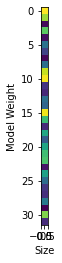

-0.0916975


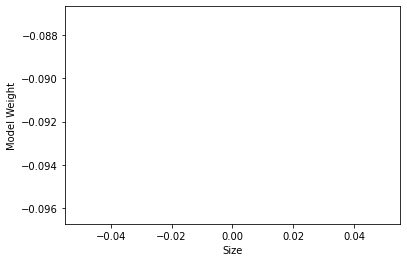

0.3148127


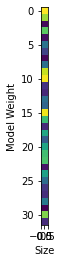

-0.09266415


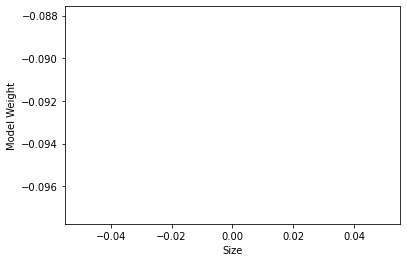

0.31563884


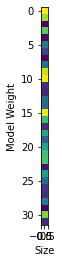

-0.09362451


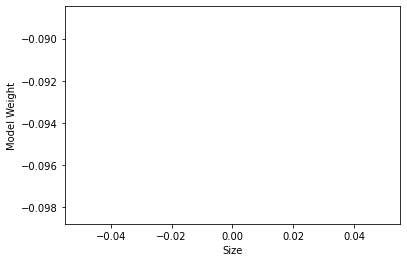

0.3164777


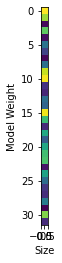

-0.09459713


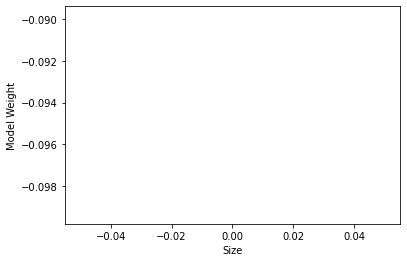

0.3173116


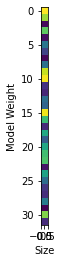

-0.095553756


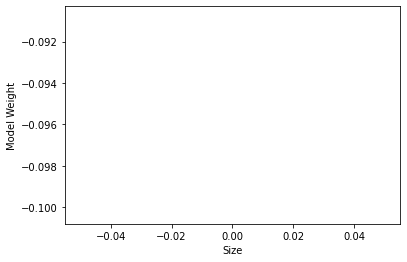

0.3181582


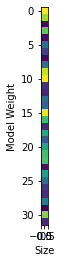

-0.09652313


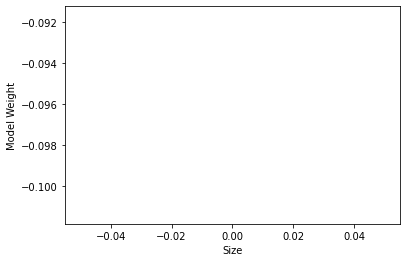

0.31901067


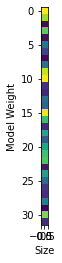

-0.09749498


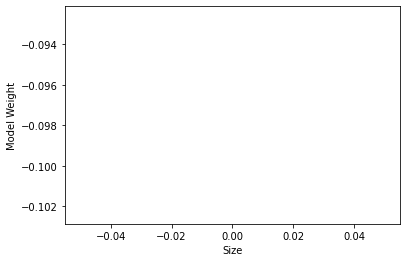

0.31988752


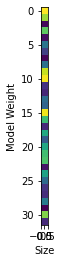

-0.09851237


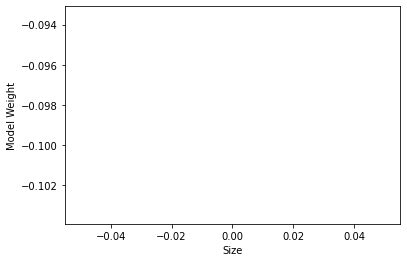

0.32076493


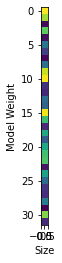

-0.09952688


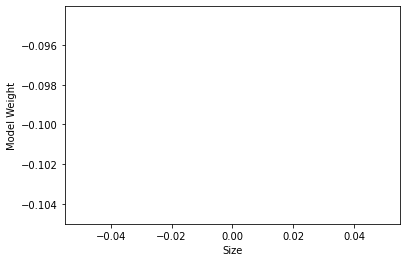

0.3216181


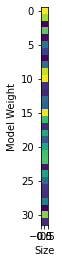

-0.10050238


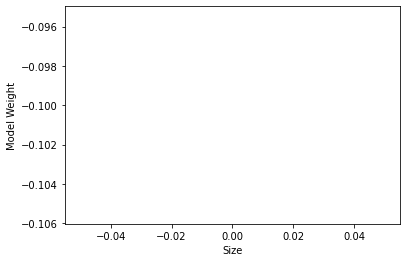

0.32246554


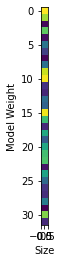

-0.101461366


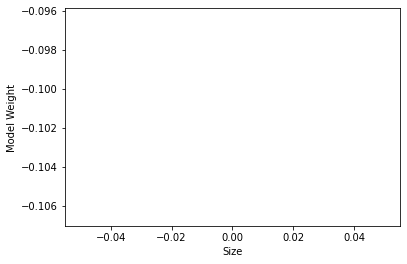

0.32333475


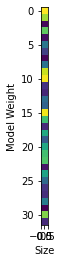

-0.10245027


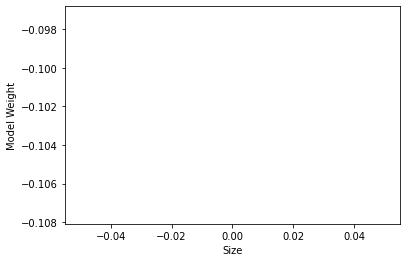

0.32420236


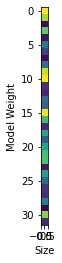

-0.103430316


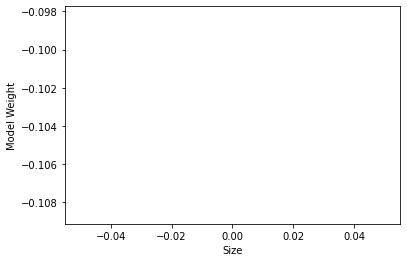

0.32508105


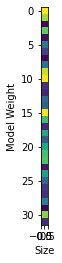

-0.10442041


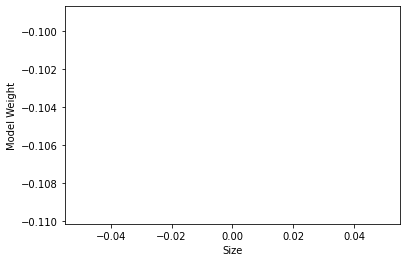

0.3259384


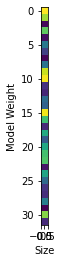

-0.10537383


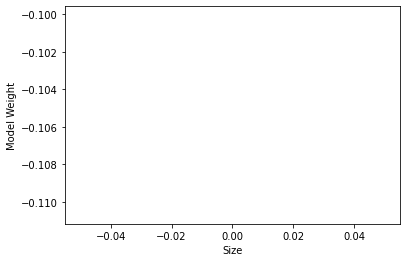

0.32675803


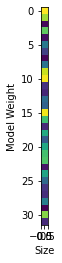

-0.10627523


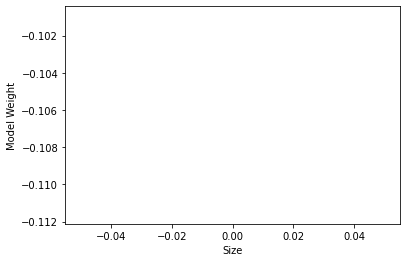

0.32757178


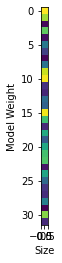

-0.10715839


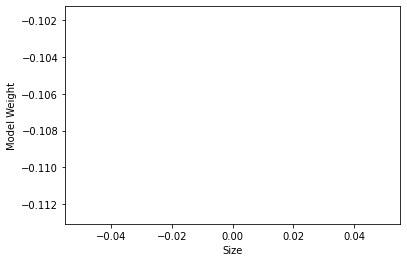

0.3283964


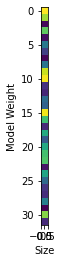

-0.10804395


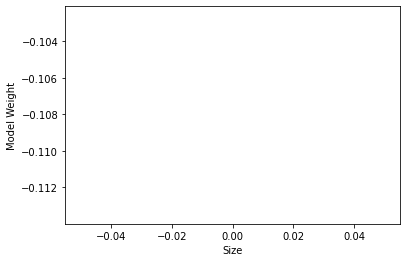

0.32922378


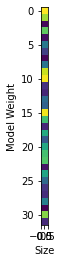

-0.10892241


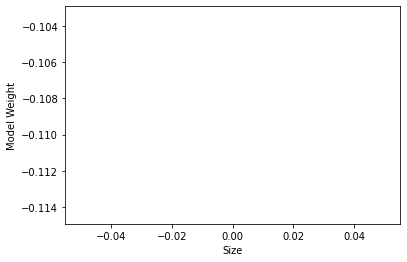

0.33000875


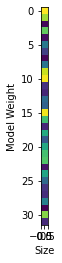

-0.10974653


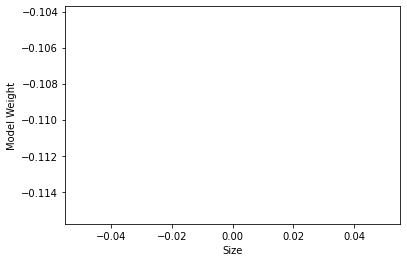

0.33082432


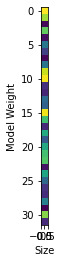

-0.110598005


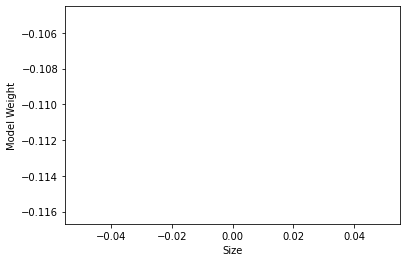

0.33162928


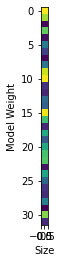

-0.11142702


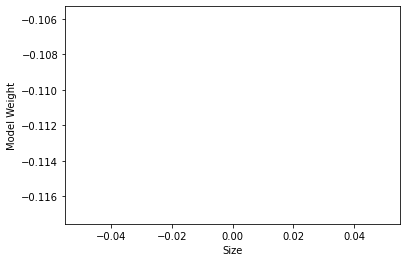

0.33245686


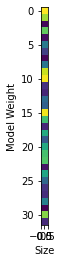

-0.112273835


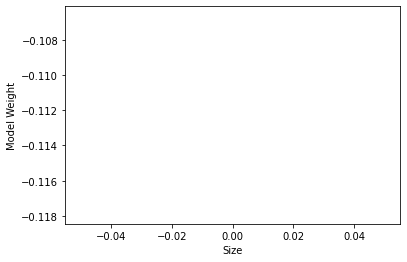

0.3332639


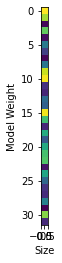

-0.11308907


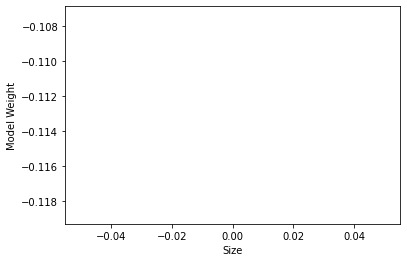

0.33410698


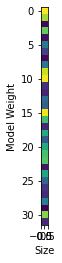

-0.113942325


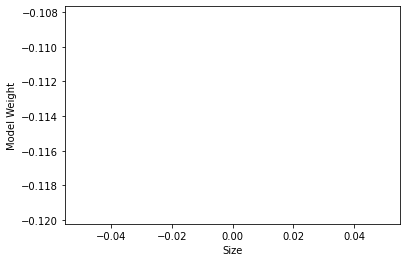

0.33497915


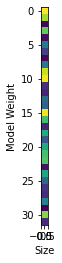

-0.11482951


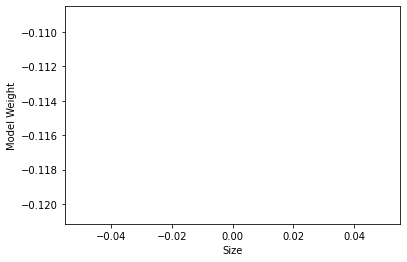

0.33582464


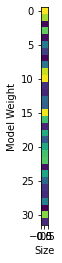

-0.11568109


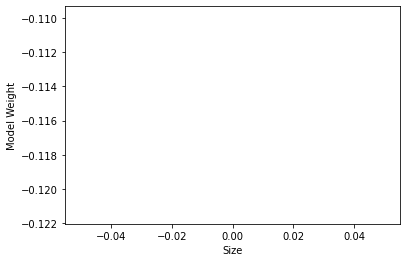

0.33668166


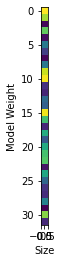

-0.11653907


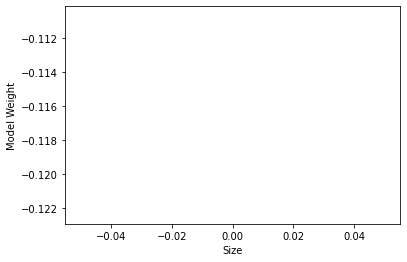

0.33751532


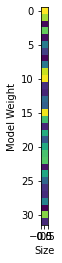

-0.11736443


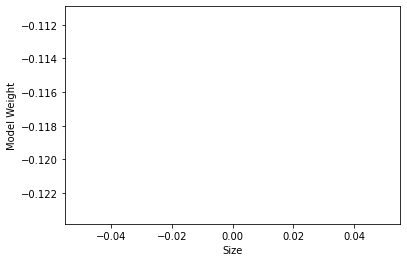

0.3383711


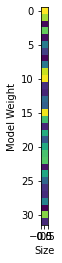

-0.118208565


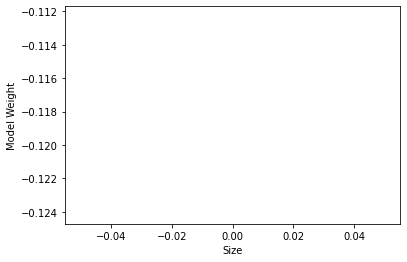

0.339231


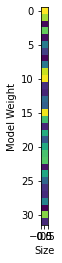

-0.11905062


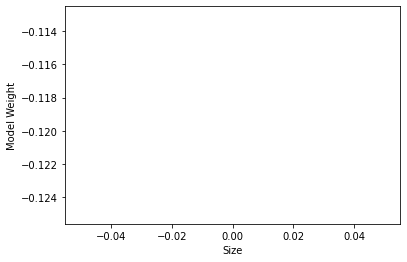

0.34010988


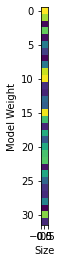

-0.11990991


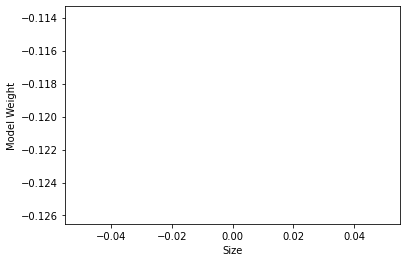

0.34099054


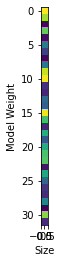

-0.12076571


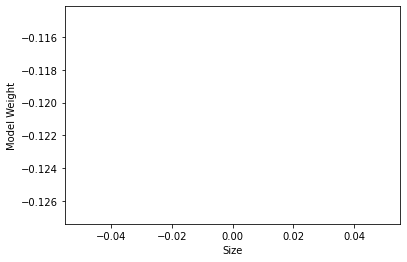

0.3418888


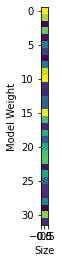

-0.12163748


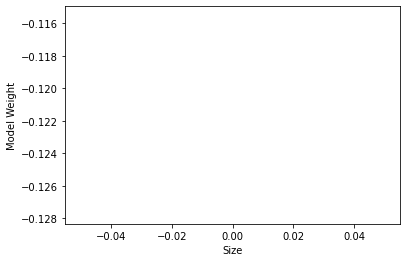

0.3427705


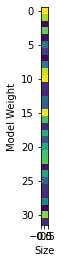

-0.12248526


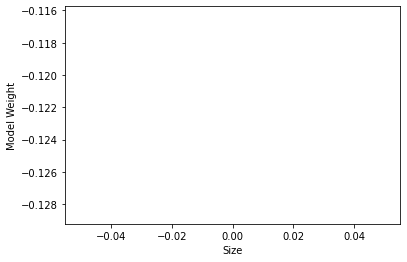

0.3436869


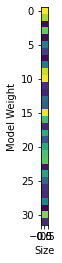

-0.12337802


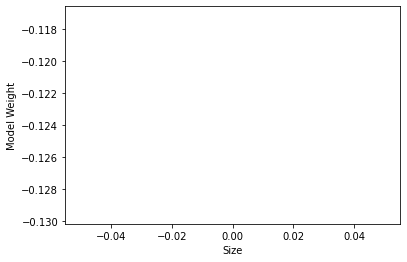

0.34463212


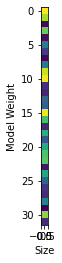

-0.12431081


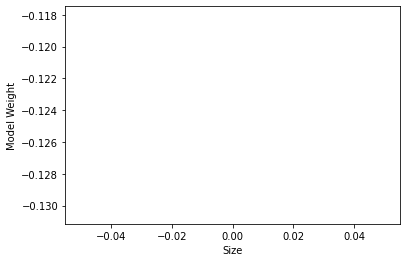

0.3455844


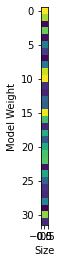

-0.12525152


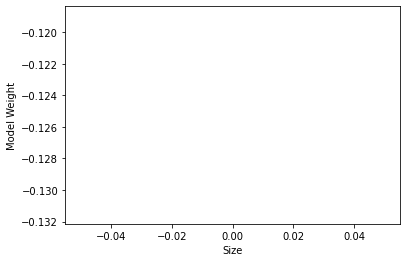

0.34653574


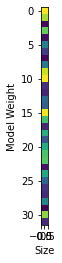

-0.12618996


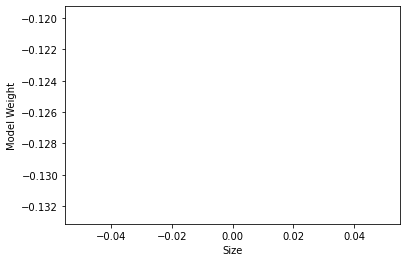

0.34748802


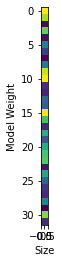

-0.12712641


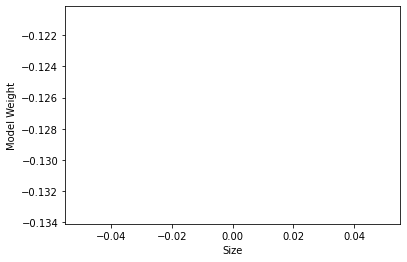

0.3484404


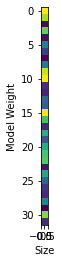

-0.12806112


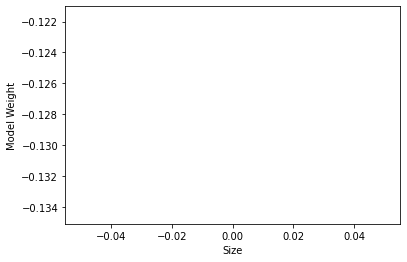

0.34942523


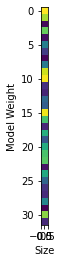

-0.12904954


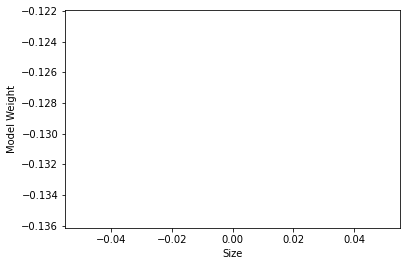

0.35041165


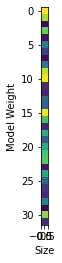

-0.13004002


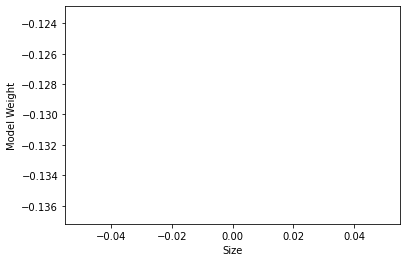

0.35138583


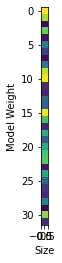

-0.13101354


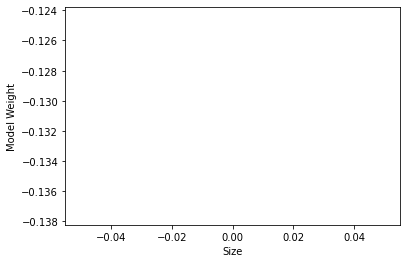

0.35235685


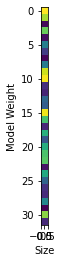

-0.13198134


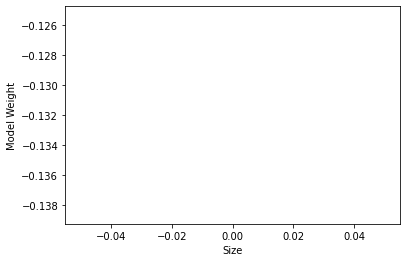

0.35335466


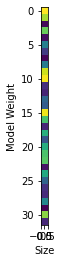

-0.13299017


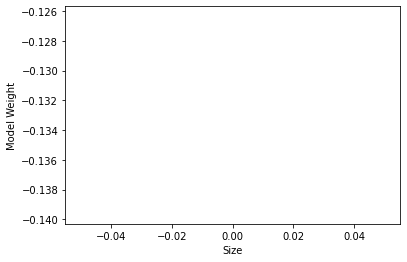

0.35433814


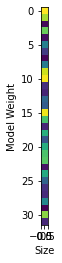

-0.13398005


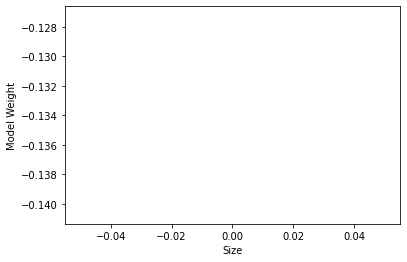

0.35533097


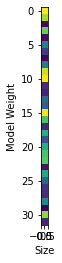

-0.13498108


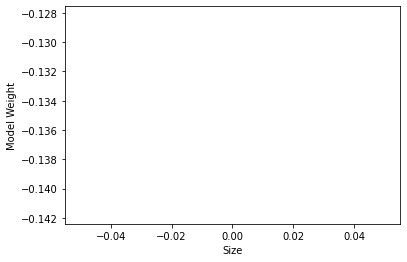

0.35630283


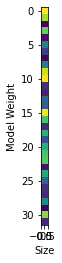

-0.13595442


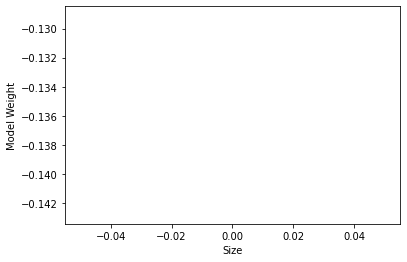

0.35727322


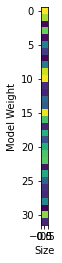

-0.13692197


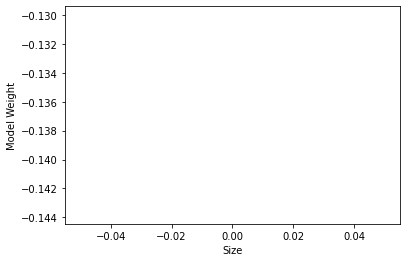

0.3582172


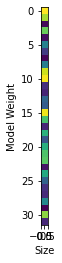

-0.1378556


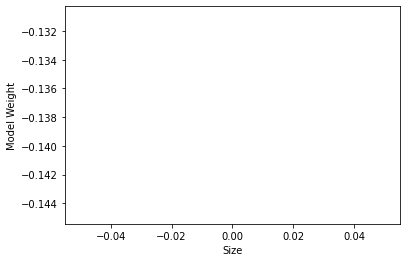

0.35916469


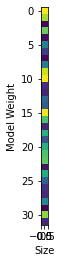

-0.13878764


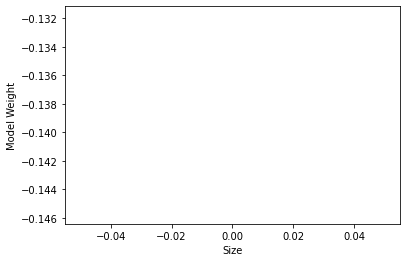

0.36011648


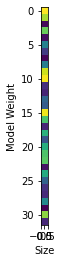

-0.1397183


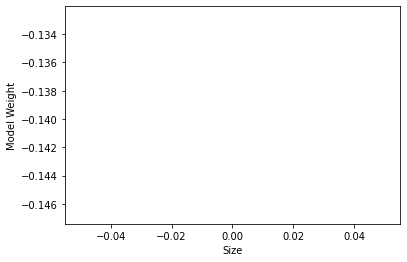

0.3610553


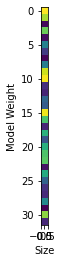

-0.14062852


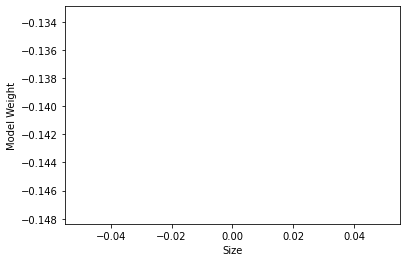

0.36201417


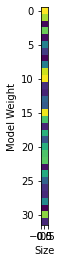

-0.14155869


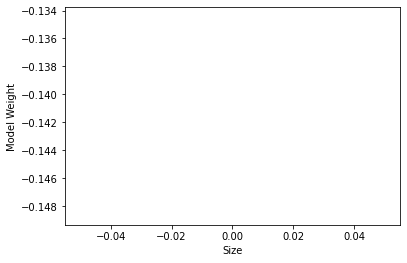

0.3629966


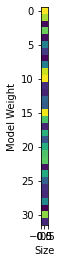

-0.14251605


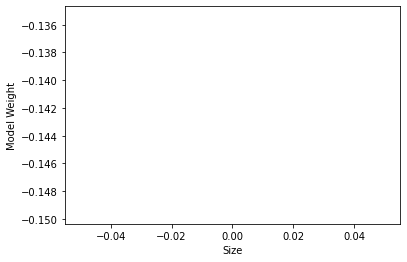

0.36397025


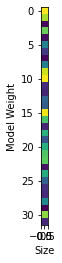

-0.1434599


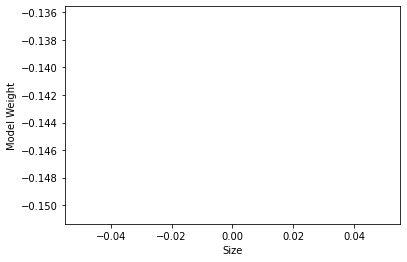

0.36496583


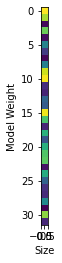

-0.1444295


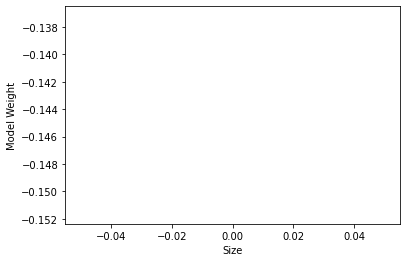

0.36595112


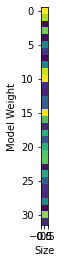

-0.14538436


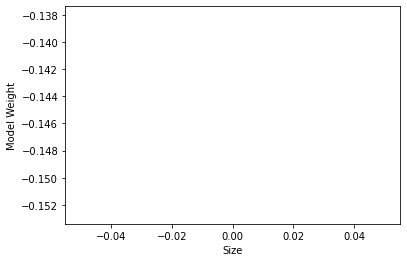

0.36693633


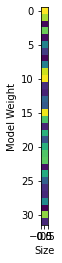

-0.14633557


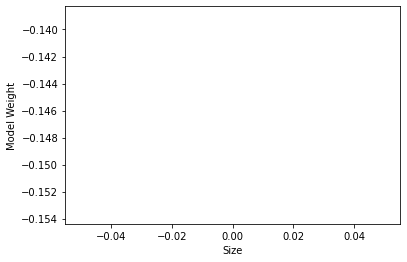

0.36793625


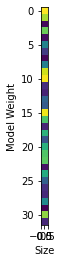

-0.1473025


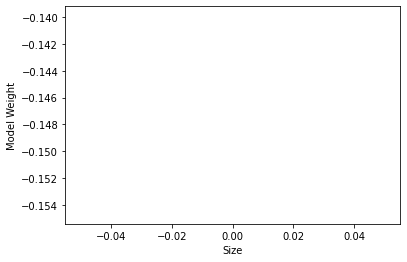

0.3689264


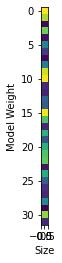

-0.14825498


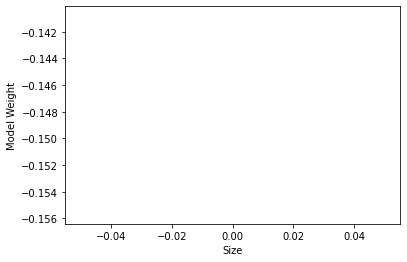

0.36989012


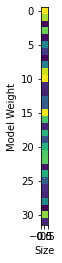

-0.14917511


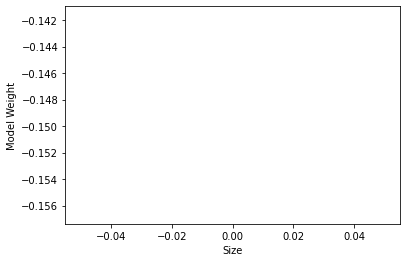

0.37085822


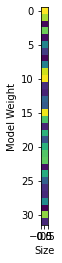

-0.1500953


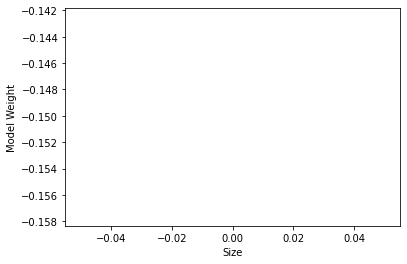

0.37185806


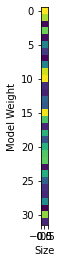

-0.1510534


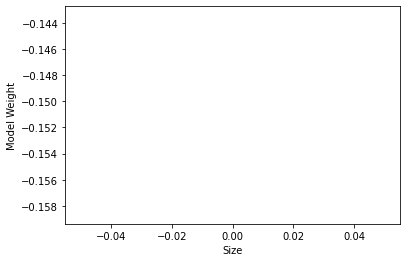

0.37285718


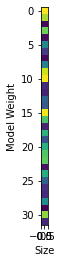

-0.15200761


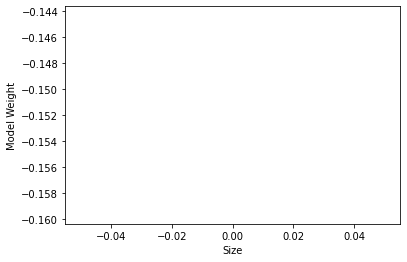

0.3738834


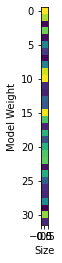

-0.15299603


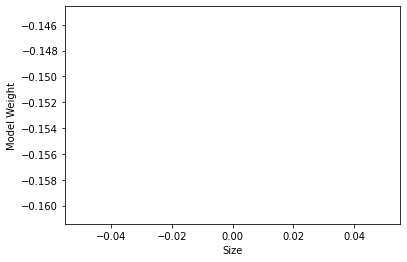

0.37492603


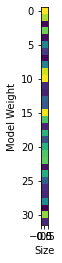

-0.15400563


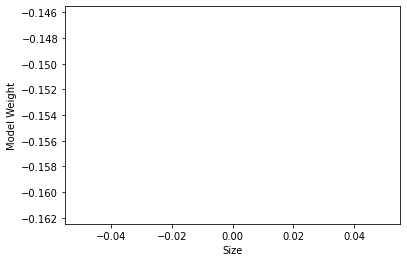

0.37596145


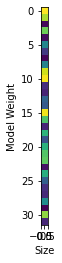

-0.1550059


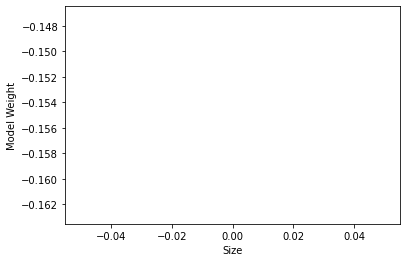

0.3770121


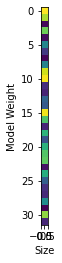

-0.15602605


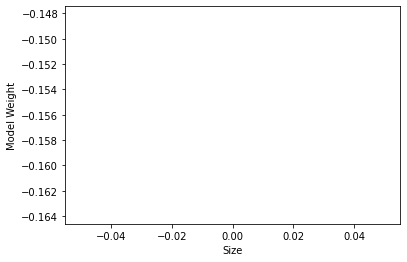

0.37804666


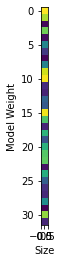

-0.15702619


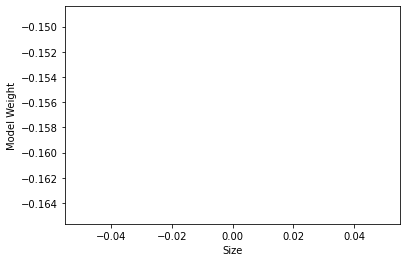

0.37904978


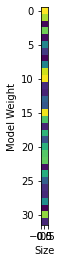

-0.15798901


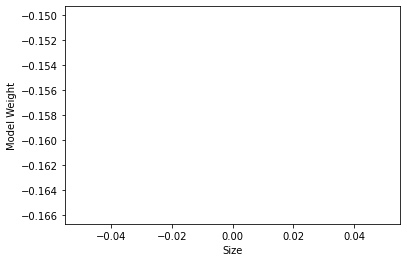

0.3800349


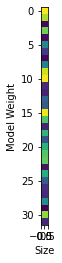

-0.15892805


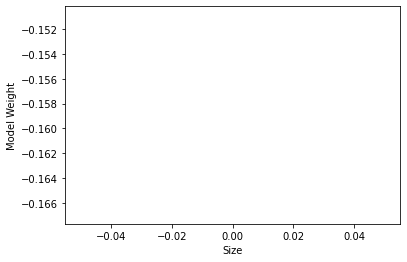

0.38101408


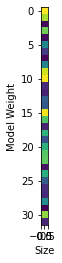

-0.15985547


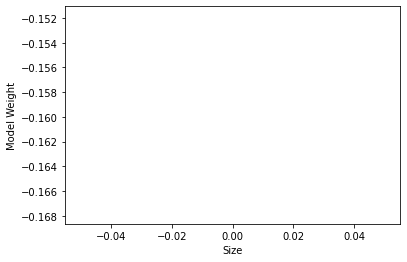

0.38196927


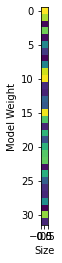

-0.16075295


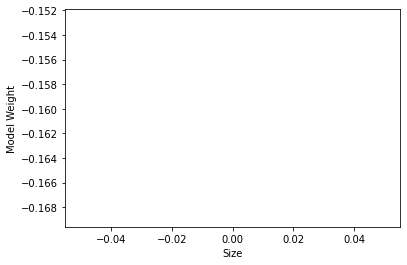

0.38294807


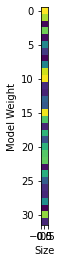

-0.16167203


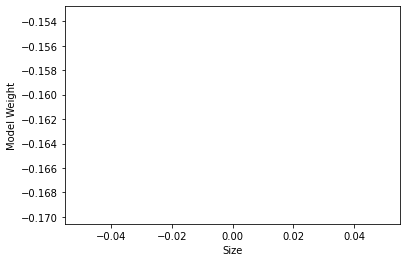

0.3839664


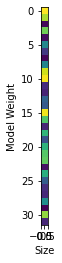

-0.16263857


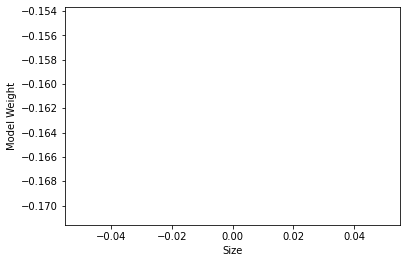

0.38502234


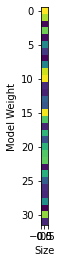

-0.16365649


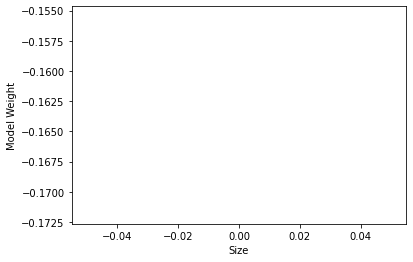

0.3860529


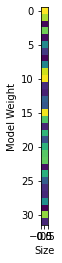

-0.1646449


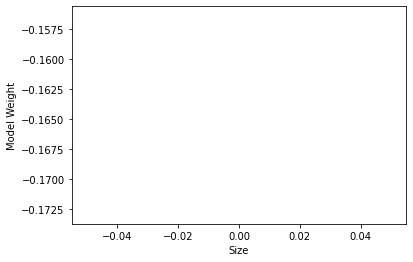

0.38710743


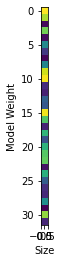

-0.16566373


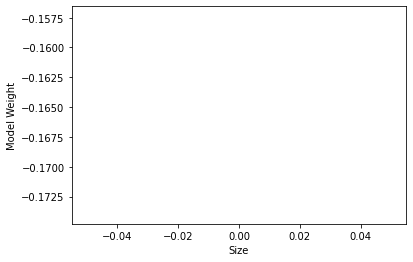

0.38816163


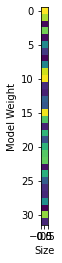

-0.16668162


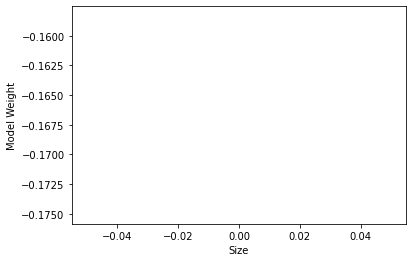

0.38922292


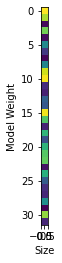

-0.16770805


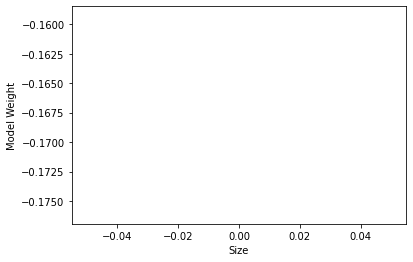

0.3902908


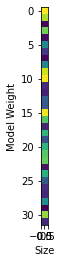

-0.1687421


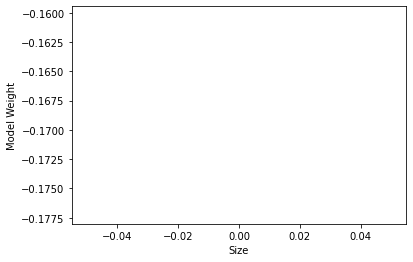

0.39132234


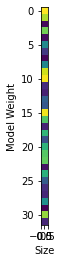

-0.16973518


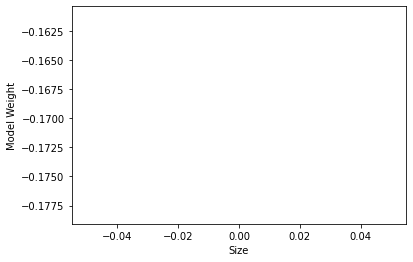

0.3923496


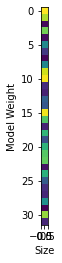

-0.1707204


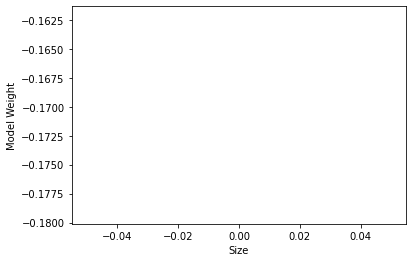

0.39338154


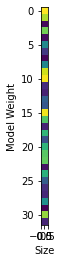

-0.17170812


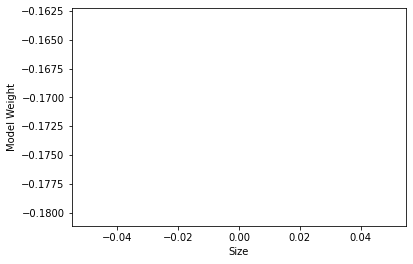

0.39439204


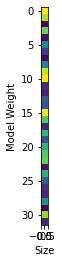

-0.17266928


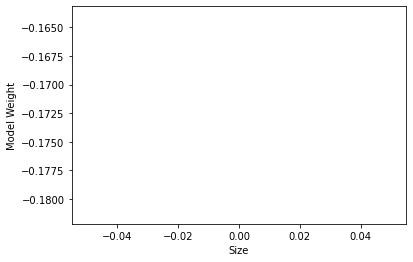

0.3954253


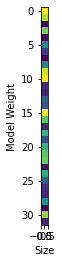

-0.17365439


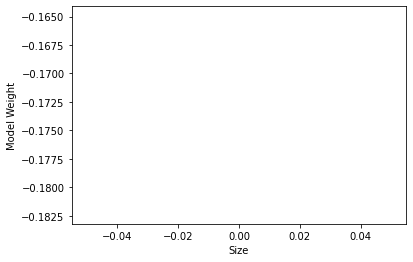

0.39643705


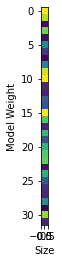

-0.17461318


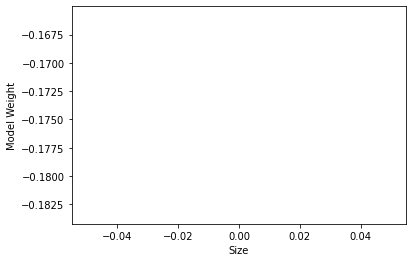

0.3974399


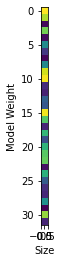

-0.17555805


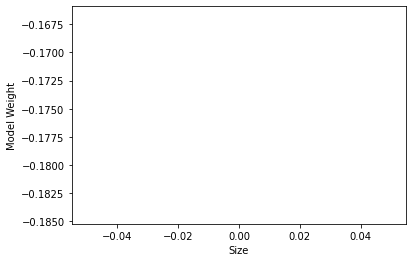

0.39845288


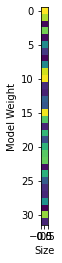

-0.1765097


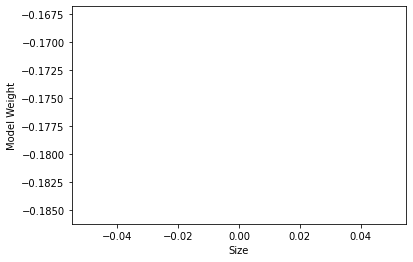

0.39949661


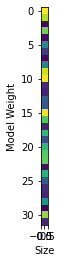

-0.17749579


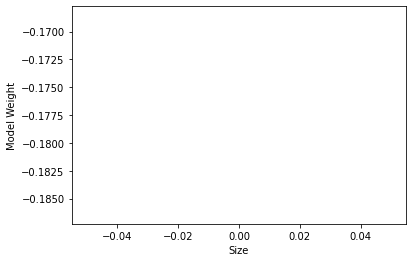

0.400518


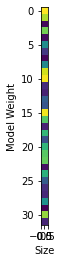

-0.17845546


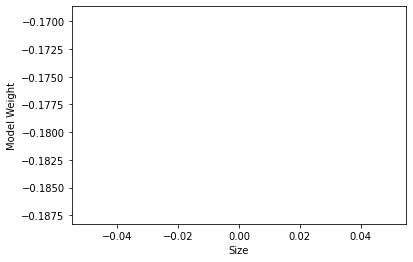

0.40155488


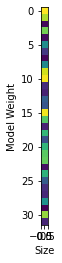

-0.17942987


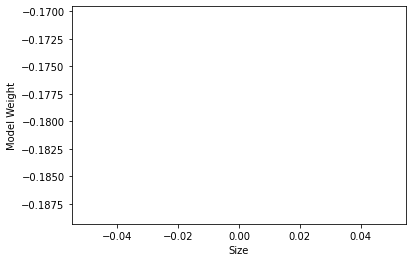

0.4026124


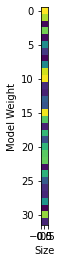

-0.18042691


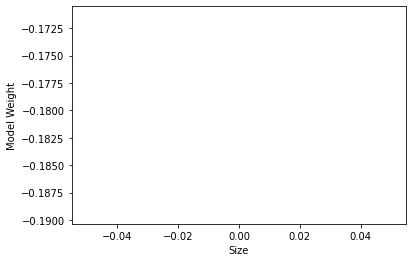

0.40362597


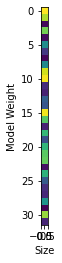

-0.18137681


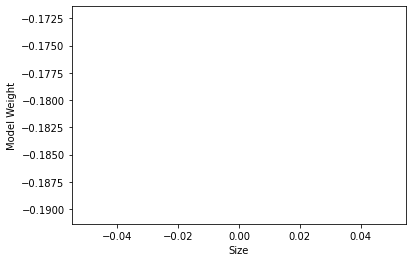

0.40464


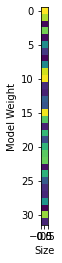

-0.18232332


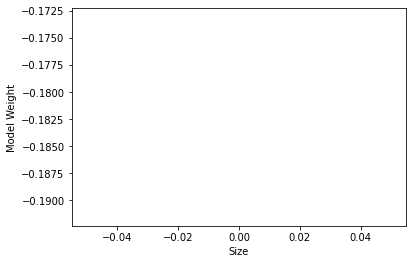

0.4056635


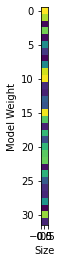

-0.18327643


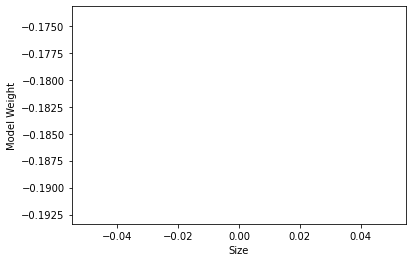

0.40669525


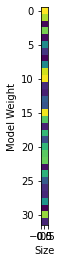

-0.18423547


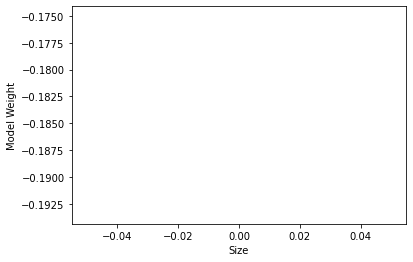

0.4076974


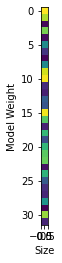

-0.18516104


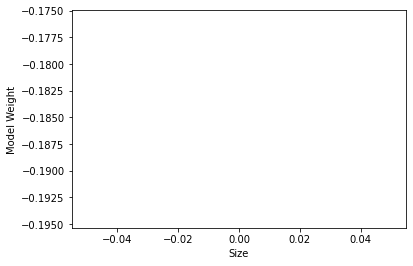

In [ ]:
std4 = []
mean4 = []

for layer in layer4:
  if(len(layer.shape) == 2):
    std4.append(np.std(layer))
    print(np.std(layer))
    plt.imshow(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()
  else:
    mean4.append(np.mean(layer))
    print(np.mean(layer))
    plt.plot(layer)
    plt.ylabel("Model Weight")
    plt.xlabel("Size")
    plt.show()

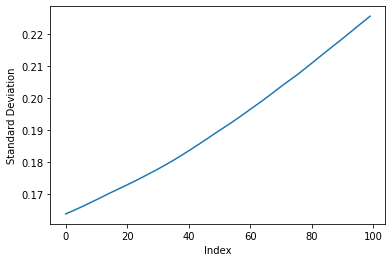

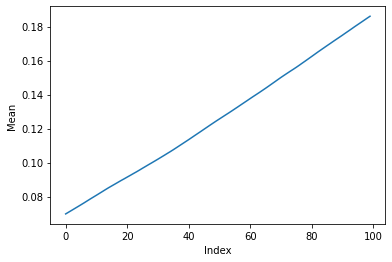

In [ ]:
plt.plot(std1)
plt.ylabel("Standard Deviation")
plt.xlabel("Index")
plt.show()
plt.plot(mean1)
plt.ylabel("Mean")
plt.xlabel("Index")
plt.show()

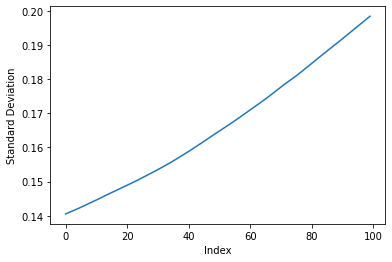

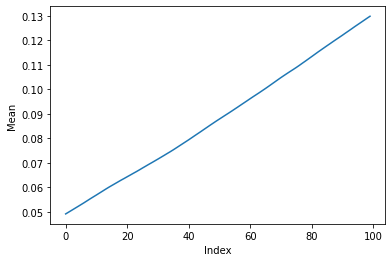

In [ ]:
plt.plot(std2)
plt.ylabel("Standard Deviation")
plt.xlabel("Index")
plt.show()
plt.plot(mean2)
plt.ylabel("Mean")
plt.xlabel("Index")
plt.show()

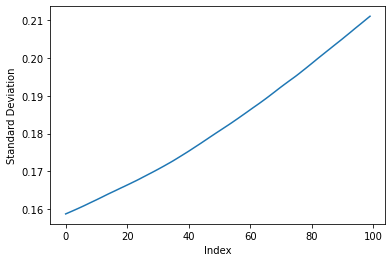

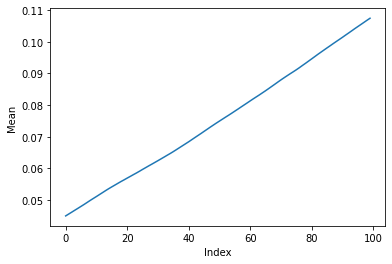

In [ ]:
plt.plot(std3)
plt.ylabel("Standard Deviation")
plt.xlabel("Index")
plt.show()
plt.plot(mean3)
plt.ylabel("Mean")
plt.xlabel("Index")
plt.show()

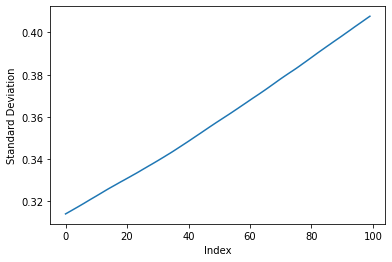

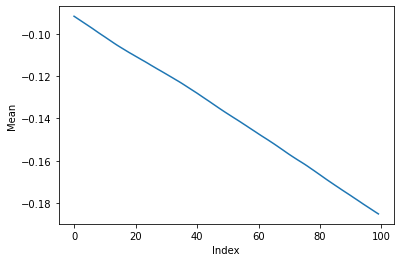

In [ ]:
plt.plot(std4)
plt.ylabel("Standard Deviation")
plt.xlabel("Index")
plt.show()
plt.plot(mean4)
plt.ylabel("Mean")
plt.xlabel("Index")
plt.show()